In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Arc
from matplotlib.transforms import IdentityTransform, TransformedBbox, Bbox
from typing import Sequence
import sys
sys.path.append('../')
from functions import AngleAnnotation, find_intercept, orb_motion

Figure 3.1: Position of the relative velocity vectors before and after a collision

In [ ]:
# Define the x range you want to plot in
x = np.arange(-3, 7, 0.5)
y = np.zeros(20)

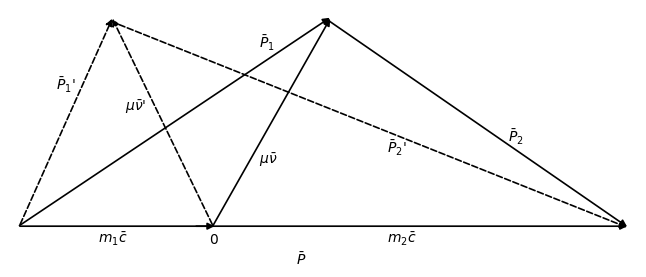

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8,3))

# Bottom line of the plot. 
# Even though it is not visible in the final plot, you will need this for the rest of the code to work
ax.plot(x, y, color = 'k', lw = 0.1)

# m1c, m2c and P vectors plotted using the plt function annotate
ax.annotate(' ', xy = (0.21,0), xytext = (-3.2,0), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center') # m1c vector
ax.annotate(' ', xy = (7,0), xytext = (-0.3,0), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center') # m2c vector
#The P vector is the m1c and m2c vectors combined
ax.text(0.075, -0.008, '0')
ax.text(-1.75, -0.008, r'$m_{1}\bar{c}$') # m1c vector name
ax.text(3, -0.008, r'$m_{2}\bar{c}$') # m2c vector name
ax.text(1.5, -0.018, r'$\bar{P}$') # P vector name

# P1, \mu\nu, and P2 vectors plotted using the plt function annotate
ax.annotate(' ', xy = (2.1,0.1), xytext = (-3.2,-0.002), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center') # P1 vector
ax.annotate(' ', xy = (2.09,0.1), xytext = (0,-0.005), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center') # \mu\nu vector
ax.annotate(' ', xy = (6.99,-0.001), xytext = (1.9,0.1), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center') # P2 vector
ax.text(0.9, 0.085, r'$\bar{P}_{1}$') # P1 vector name
ax.text(0.9, 0.03, r'$\mu\bar{\nu}$') # \mu\nu vector name
ax.text(5, 0.04, r'$\bar{P}_{2}$') # P2 vector name

# P1', \mu\nu', and P2' vectors plotted using the plt function annotate
ax.annotate(' ', xy = (-1.5,0.1), xytext = (-3.16,-0.005), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'ls': '--', 
            'facecolor':'k'}), va = 'center') # P1' vector
ax.annotate(' ', xy = (-1.535,0.1), xytext = (0.19,-0.005), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'ls': '--', 
            'facecolor':'k'}), va = 'center') # mu\nu' vector
ax.annotate(' ', xy = (6.99,-0.001), xytext = (-1.7,0.099), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'ls': '--', 
            'facecolor':'k'}), va = 'center') # P2' vector
ax.text(-2.45, 0.065, r'''$\bar{P}_{1}$' ''') # P1' vector name
ax.text(-1.3, 0.055, r'''$\mu\bar{\nu}$' ''') # \mu\nu' vector name
ax.text(3, 0.035, r'''$\bar{P}_{2}$' ''') # P2' vector name

# Removing axis and axis ticks from figure
plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True) # Remove the frame of the plot

ax.set_xlim(-3.1, 7.1)
ax.set_ylim(-0.01, 0.1)

plt.savefig('velocity_vectors.png', dpi = 150)
plt.show()

Figure 3.2: Scattering of particle 1 with respect to particle 2 in the impact parameter picture

In [ ]:
# Baseline and linear trajectories
x_baseline = np.linspace(0, 10, 21) # baseline
y_baseline = np.zeros(21)

x_b = np.zeros(21)+2 # Perpendicular distance from particle 2 to the velocity vector \nu
y_b = np.linspace(0, 2, 21)

x_Rt = np.linspace(2, 8, 21) # Trajectory from point 1 to 2
y_Rt = np.linspace(2, 0, 21)

x_dot_top = np.linspace(3.5, 8.1, 21) # Trajectory following vector \nu starting in point 1
y_dot_top = y_baseline+2

x_dot_bottom = np.linspace(8, 10, 21) # Trajectory from point 2, angle theta from the baseline
y_dot_bottom = y_b

x_dot_end = np.linspace(8.69, 9, 21) # Trajectory leading to vector \nu'
y_dot_end = np.linspace(2.25, 2.6, 21)

In [ ]:
# Vectors
## Vector origin location (\nu)
x_vec_start = 2
y_vec_start = 2
x_vec_end = 9
y_vec_end = 2.6

## Directional vector (\nu')
u_vec_start = 1.5
v_vec_start = 0
u_vec_end = 0.9
v_vec_end = 1.3

In [ ]:
# Exponential part of trajectory joining vector \nu with vector \nu'
x_exp = np.linspace(0, 2, 42)
y_exp = x_exp**2.59

In [ ]:
# Angles
center = (8, 0)

baseline = [(2, 0), (10, 0)] # only used for plotting the angle annotation
p1 = (2, 2) # psi angle
p2 = (10, 2) # theta angle

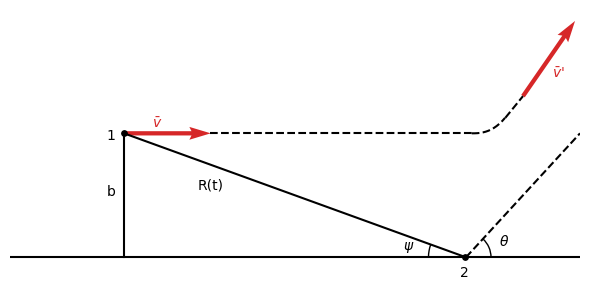

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,3))

# Baseline and linear trajectories
ax.plot(x_baseline, y_baseline, color = 'k') # Baseline
ax.plot(x_b, y_b, color = 'k', zorder = 10) # Perpendicular distance from particle 2 to the velocity vector \nu
ax.text(1.7, 1, 'b')
ax.plot(x_Rt, y_Rt, color = 'k') # Trajectory from point 1 to 2
ax. text(3.3, 1.1, 'R(t)')
ax.plot(x_dot_top, y_dot_top, color = 'k', ls = '--') # Trajectory following vector \nu starting in point 1
ax.plot(x_dot_bottom, y_dot_bottom, color = 'k', ls = '--') # Trajectory from point 2, angle theta from the baseline
ax.plot(x_dot_end, y_dot_end, color = 'k', ls = '--') # Trajectory leading to vector \nu'

# Vectors \nu and \nu'
ax.quiver(x_vec_start, y_vec_start, u_vec_start, v_vec_start, color='tab:red', units='xy', scale=1)
ax.text(2.5, 2.1, r'$\bar{v}$', color = 'tab:red')
ax.quiver(x_vec_end, y_vec_end, u_vec_end, v_vec_end, color='tab:red', units='xy', scale=1)
ax.text(9.5, 2.9, r'''$\bar{v}$' ''', color = 'tab:red')

# Exponential part of trajectory
below = x_exp < 0.63414634
sns.lineplot(x = x_exp[below]+8.1, y = y_exp[below]+2, color = 'k', ls = '--')

# Points 1 and 2
ax.scatter(2, 2, color = 'k', s = 15)
ax.text(1.7, 1.9, '1')
ax.scatter(7.98, 0, color = 'k', s = 15)
ax.text(7.9, -0.3, '2')

# Angles psi and theta
am1 = AngleAnnotation(center, p1, baseline[0], ax = ax, size = 75, text = r'$\psi$', textposition = 'outside')
am2 = AngleAnnotation(center, baseline[1], p2, ax = ax, size = 50, text = r'$\theta$', textposition = 'outside')

# Removing axis and axis ticks from figure
plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

ax.set_xlim(0, 10)
ax.set_ylim(-0.35, 4)

plt.tight_layout()
plt.savefig('scatter.png', dpi = 150)
plt.show()

Figure 3.3: The relative motion is divided into motion along the center of mass distance and orbital motion
perpendicular to the center of mass motion

In [ ]:
# Baseline of the figure
x_baseline_fig3 = np.linspace(0, 10, 21)
y_baseline_fig3 = np.zeros(21)

x_b_fig3 = y_baseline_fig3+2.5
y_b_fig3 = np.linspace(4, 0, 21)

x_R_fig3 = np.array(np.linspace(2.5, 7.5, 21))
y_R_fig3 = np.array(y_b_fig3)

# Line connecting R\Delta\psi with baseline
x_R2_fig3 = np.linspace(3.17, 7.5, 21)
y_R2_fig3 = np.linspace(4.67, 0, 21)

# v(bar)\Delta t
x_vt_fig3 = np.linspace(2.5, 4, 21)
y_vt_fig3 = y_baseline_fig3+4

# R\Delta\psi
x_Rpsi_fig3 = np.linspace(2.5, 3.17, 21)
y_Rpsi_fig3 = np.linspace(4, 4.67, 21)

# Line connecting v(bar)\Delta t and R
x_con_fig3 = np.array(np.linspace(3.33, 4, 21))
y_con_fig3 = x_con_fig3

# Line connecting R\Delta\psi with v(bar)\Delta t
x_btop_fig3 = np.linspace(3.17, 4, 21)
y_btop_fig3 = np.linspace(4.67, 4, 21)

In [8]:
# Linear fit of R
reg_R = LinearRegression().fit(x_R_fig3.reshape(-1,1), y_R_fig3)
print(reg_R.coef_[0])
print(reg_R.intercept_)

# Linear fit of line connecting v(bar)\Delta t and R
reg_con = LinearRegression().fit(x_con_fig3.reshape(-1,1), y_con_fig3)
print(reg_con.coef_[0])
print(reg_con.intercept_)

# Find intercept of R and line connecting v(bar)\Delta t and R
m_R, c_R = reg_R.coef_[0], reg_R.intercept_       # y = -0.8x + 6.0
m_con, c_con = reg_con.coef_[0], reg_con.intercept_     # y = x

x_inter, y_inter = find_intercept(c_R, c_con, m_R, m_con)
print('x intercept: ', x_inter) # Used as starting point for x_con_fig3

-0.7999999999999999
6.0
1.0000000000000004
-1.7763568394002505e-15
x intercept:  3.333333333333334


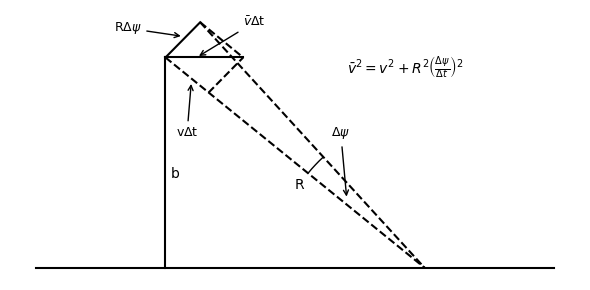

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,3))

ax.plot(x_baseline_fig3, y_baseline_fig3, color = 'k') # Baseline
ax.plot(x_b_fig3, y_b_fig3, color = 'k')
ax.text(2.6, 1.7, 'b')
ax.plot(x_R_fig3, y_R_fig3, color = 'k', ls = '--')
ax.text(5, 1.5, 'R')
#v\Delta t
ax.annotate(r'v$\Delta$t', xy = (3, 3.55), xytext = (2.7, 2.5), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)
# Line connecting R\Delta\psi with baseline
ax.plot(x_R2_fig3, y_R2_fig3, color = 'k', ls = '--')
# v(bar)\Delta t
ax.plot(x_vt_fig3, y_vt_fig3, color = 'k')
ax.annotate(r'$\bar{v}\Delta$t', xy = (3.1, 4), xytext = (4, 4.6), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)
# R\Delta\psi
ax.plot(x_Rpsi_fig3, y_Rpsi_fig3, color = 'k')
ax.annotate(r'R$\Delta\psi$', xy = (2.85, 4.4), xytext = (1.5, 4.5), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)
# Line connecting v(bar)\Delta t and R
ax.plot(x_con_fig3, y_con_fig3, color = 'k', ls = '--')
# Line connecting R\Delta\psi with v(bar)\Delta t
ax.plot(x_btop_fig3, y_btop_fig3, color = 'k', ls = '--')

# Angle \delta\psi
am = AngleAnnotation((x_R_fig3[-1], y_R_fig3[-1]), (x_R2_fig3[0], y_R2_fig3[0]), (x_R_fig3[0], y_R_fig3[0]),
                     ax = ax, size = 300)
ax.annotate(r'$\Delta\psi$', xy = (6, 1.3), xytext = (5.7, 2.5), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)

# Equation
ax.text(6, 3.7, r'$\bar{v}^{2}=v^{2}+R^{2}\left(\frac{\Delta\psi}{\Delta t}\right)^{2}$')

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()
plt.savefig('rel_motion.png', dpi = 150)
plt.show()

Figure 3.4: The orbital motion and the interaction potential forms an effective potential

In [ ]:
# Parameters for potentials
D_e = 10 # Dissociation energy
R = np.arange(0.1, 2, 0.001) # Internuclear separation
r_eq = 1 # Equilibrium bond distance
b = 5 # Controls width of potential
l = 1 # Rotational quantum number
mu = 0.05 # Reduced mass

# Define Morse, anti-Morse, and effective potentials
V_morse, anti, V_eff = orb_motion(D_e, b, R, r_eq, l, mu)

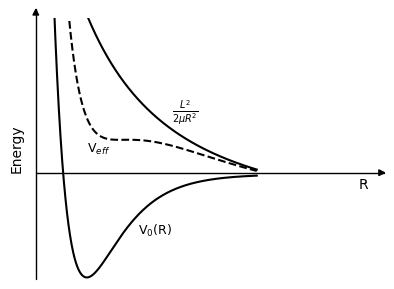

In [ ]:
fig = plt.figure(figsize = (4,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# Morse potential (V_0(R))
plt.plot(R-0.7, V_morse-0.15, color = 'k')
ax.text(0.6, -6, r'V$_{0}$(R)', fontsize = 9)
# Anti-Morse potential (L^2/(2\muR^2))
plt.plot(R-0.7, anti-0.2, color = 'k')
ax.text(0.3, 2, r'V$_{eff}$', fontsize = 9)
# Effective potential (V_eff)
plt.plot(R-0.7, V_eff-0.2, color = 'k', ls = '--')
ax.text(0.8, 5.5, r'$\frac{L^{2}}{2\mu R^{2}}$')

ax.text(1.9, -1.5, 'R')
ax.set_ylabel('Energy')
plt.xlim(0,2)
plt.ylim(-10.3,15)

plt.tight_layout()
plt.savefig('orb_motion.png', dpi = 150)
plt.show()